In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

# Monte Carlo exponential and uniform separaterly

In [2]:
# exponential distribution
def M_CDF(mu):
    return 1-np.exp(-mu) # integrate M(mu) from 0 to mu bc mu needs to be positive (polar coords)

def M_inverseCDF(r):
    return -np.log(np.abs(1-r))

# uniform distribution
def Theta_CDF(theta):
    return theta/(2*np.pi)

def Theta_inverseCDF(r):
    return r*2*np.pi

In [62]:
Nsamp = 1e5
trials = range(int(Nsamp))

values_mu = np.zeros(int(Nsamp))
values_theta = np.zeros(int(Nsamp))

# Generate mu and theta separately
for i in trials:
    r1 = r.random() # value between 0 and 1
    r2 = r.randrange(-1000, 1000)/1000 # value between -1 and 1
    values_mu[i] = M_inverseCDF(r1) # store randomly generated mu's
    values_theta[i] = Theta_inverseCDF(r2) # store randomly generated theta's

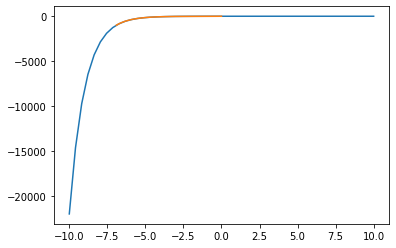

In [63]:
# debugging

test = np.linspace(-10, 10)
plt.plot(test, M_CDF(test))

test_r = np.linspace(-1000, 0)
plt.plot(M_inverseCDF(test_r), test_r)

# Convert back to x and y

In [65]:
# Convert to polar coordinates (mu --> r)

sigma = 1 # arbitrary

values_r = np.sqrt(2*sigma**2 * values_mu)

In [66]:
# Convert to cartesian

x = values_r*np.cos(values_theta)
y = values_r*np.sin(values_theta)

print("mean", np.mean(x))
print("std", np.std(x))

mean 0.0013072642023704741
std 0.9999004360420222


# Plotting

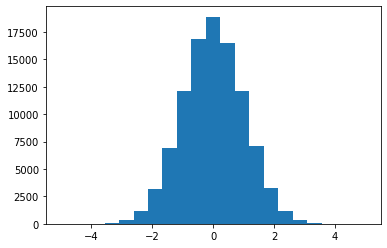

In [67]:
bins = np.linspace(-5, 5, 22)
hist = plt.hist(x, bins)
plt.show()

counts = hist[0]
bin_edges = hist[1]

bin_widths = np.mean(np.diff(bin_edges))
bin_middles = bin_edges+bin_widths/2
bin_middles = bin_middles[:-1]

# normalize
norm = Nsamp*bin_widths
counts /= norm

In [68]:
# Verify quantitatively that your random number generator works.

counts

array([0.00000e+00, 0.00000e+00, 2.73000e-04, 1.55400e-03, 7.24500e-03,
       2.36670e-02, 6.65700e-02, 1.45047e-01, 2.54520e-01, 3.54417e-01,
       3.96732e-01, 3.46584e-01, 2.53512e-01, 1.48785e-01, 6.80400e-02,
       2.37300e-02, 7.20300e-03, 1.68000e-03, 3.99000e-04, 2.10000e-05,
       2.10000e-05])